# House Prediction Model

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import the dataset

In [2]:
house_data = pd.read_csv('house_data.csv')

## Read the dataset and know more about it using head info and describe functions.

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Considering the bedrooms column, the dataset has a house with massive 33 bed rooms so, this can help us know how bedrooms affect the house price. Maximum square feet is 13,450 and the minimum is 290 indicating that the data is distributed.

## Lets check the most common house sold out according to bedrooms.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

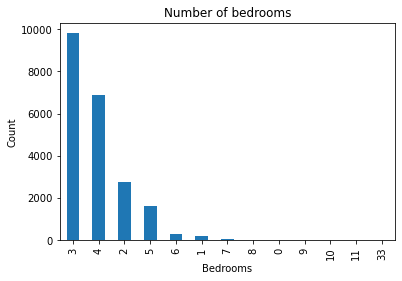

In [6]:
house_data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

### From the Visualisation above, the 3 bedroom houses are commonly sold out followed by 4 bedroom houses, here, a builder can build more houses of 3 bedrooms to attract more customers.

## Let us visualize the location of houses based on latitude and longitude

<Figure size 720x720 with 0 Axes>

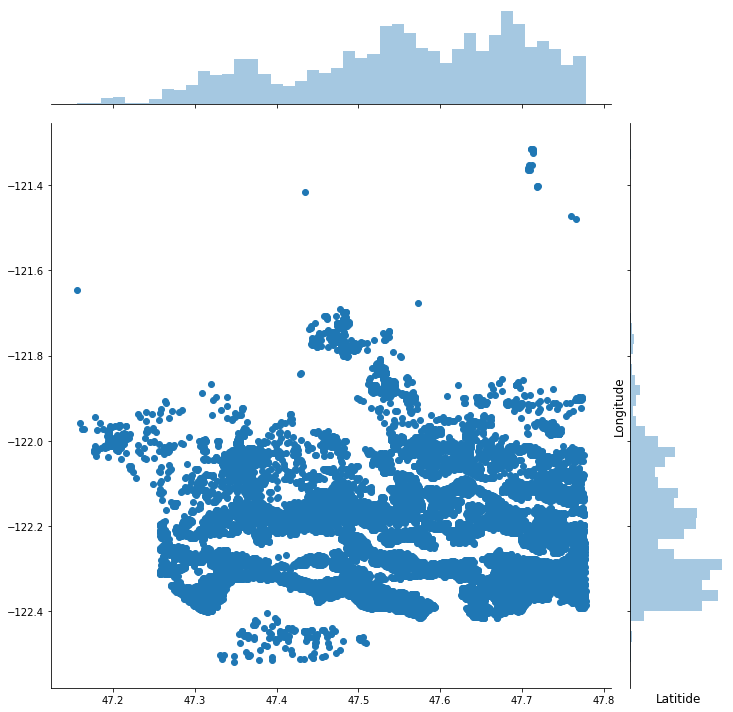

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x=house_data.lat.values, y=house_data.long.values, height = 10)
plt.xlabel('Latitide', size=12)
plt.ylabel('Longitude', size=12)
plt.show()
sns.despine

### We used Jointplot to see where data is concentrated and we see many houses are between 47.7 and 47.8 which means its an ideal location to setup houses. With longitude, houses are more concentrated between -122.2 and -122.4 so most of the customers are in this location.

## Let us find out how Square feet is affecting house prices

Text(0.5, 1.0, 'Price Vs Square fit living')

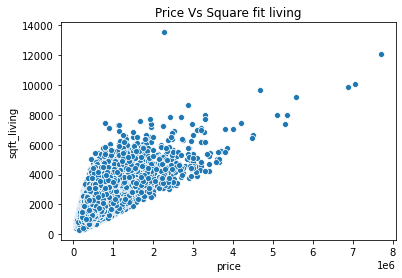

In [14]:
sns.scatterplot(house_data.price, house_data.sqft_living)
plt.title('Price Vs Square fit living')

### We used a scalerplot to see how our data points are scattered. We can see that the more the living area, the more the house price. The plot shows us that the house with more square feet was sold at a low price which is an irregularity in the data.

## Let us find out how the area location is affecting house prices

Text(0.5, 1.0, 'Price Vs Location of the area')

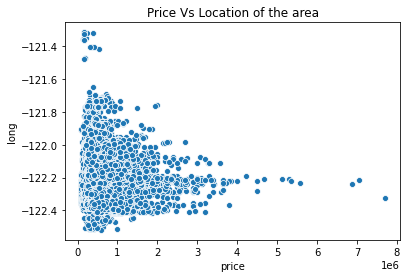

In [13]:
sns.scatterplot(data=house_data, x="price", y="long")
plt.title('Price Vs Location of the area')

### The observation in the scatterplot shows that -122.2 to -122.4 sells houses at much higher amount.

## Let us find out how bedrooms are affecting house prices

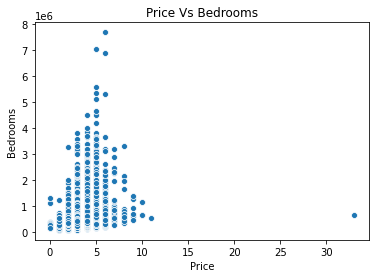

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [21]:
sns.scatterplot(house_data.bedrooms, house_data.price)
plt.title('Price Vs Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()
sns.despine

## Let us find out how Total Square feet including basement is affecting house prices

Text(0.5, 1.0, 'Total Square Feet including Basement and Price')

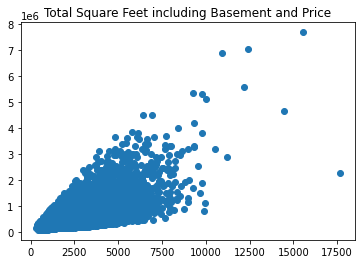

In [33]:
plt.scatter((house_data['sqft_living'] + house_data['sqft_basement']), house_data.price)
plt.title('Total Square Feet including Basement and Price')

## Let us visualize how watefront is affecting house prices

Text(0.5, 1.0, 'Waterfront Vs Price')

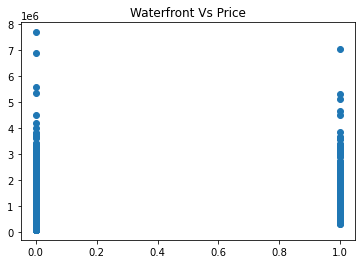

In [32]:
plt.scatter(house_data.waterfront,house_data.price)
plt.title('Waterfront Vs Price')

### Let us visualize how the floors are affecting house prices

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

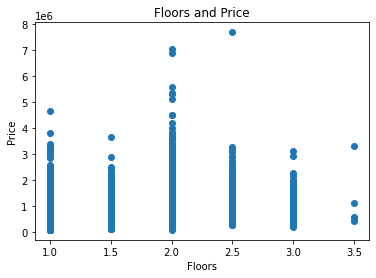

In [40]:
plt.scatter(house_data.floors, house_data.price)
plt.title('Floors and Price')
plt.xlabel('Floors')
plt.ylabel('Price')
sns.despine

## Let us visualize how the house condition affects its price.

Text(0, 0.5, 'Price')

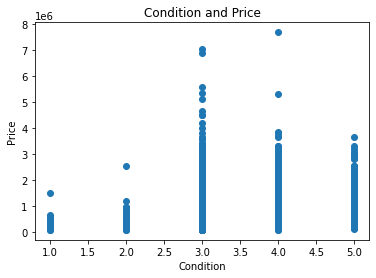

In [41]:
plt.scatter(house_data.condition, house_data.price)
plt.title('Condition and Price')
plt.xlabel('Condition')
plt.ylabel('Price')

## Let us visualize how the area zipcode affects house prices.

Text(0, 0.5, 'Price')

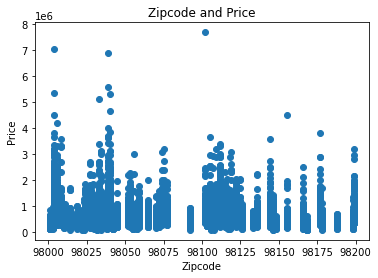

In [42]:
plt.scatter(house_data.zipcode, house_data.price)
plt.title('Zipcode and Price')
plt.xlabel('Zipcode')
plt.ylabel('Price')

# Lets apply Linear Regression on the data to predict prices.

### Import LinearRegression class from linear_model library

In [43]:
from sklearn.linear_model import LinearRegression

### Initialize Linear Regression to a variable reg

In [44]:
reg = LinearRegression()

### Set labels as price columns and convert dates to 1’s and 0’s so that it doesn’t influence our data much. We use 0 for houses which are new that is built after 2014.

In [3]:
labels = house_data['price']
conv_dates = [1 if '2014' in values else 0 for values in house_data['date']]
house_data['date'] = conv_dates
train1 = house_data.drop(['id','price'], axis =1)

### Check out the new dataset wwith changed dates.

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,1,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,1,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,1,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Import train_test_split class from model_Selection library to split our data into train and test.

In [93]:
from sklearn.model_selection import train_test_split

### We set the train data as 90% and 10% of the data to be my test data , and randomize the splitting of data by using random_state.

In [94]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)

### Fit our data to fit the training model

In [95]:
reg.fit(x_train, y_train)

LinearRegression()

### Check the prediction of our model

In [97]:
reg.score(x_test, y_test)

0.7335646231303599

### Since the prediction is 73% lower than 85% target, we use gradient boosting regression for such a weak prediction.

### Import ensemble class from sklearn library

In [99]:
from sklearn import ensemble

### Define our gradient boosting regressor in the new variable clf

In [102]:
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split = 2, learning_rate  = 0.1, 
                                         loss= 'ls')

### We now Fit our training data into the gradient boosting model and check for accuracy

In [105]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [106]:
clf.score(x_test, y_test)

0.9219008611096816

### In conclusion therefore, We have achieved the 85% target with 92.2%. This is a good result and clearly shows that gradient boosting is the perfect model for determining house price.